<h2>Twitter Data Visualization Using Pandas and matplotlib</h2>
<p>In this example we use pandas and matplotlib to perform some basic analysis and visualization on our #climatechange dataset. First we identify the top 20 retweeted tweets, process the tweet counts into 5-minute bins, and visualize the results. By doing this we can see how tweet lifespans vary over time and how they can be affected by the daily cycle. If you would like to save the images that are created, you can uncomment the lines below that make a call to <code>plt.savefig</code>.</p>

In [1]:
import csv
import re
import datetime
import os
import sys
import math
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np
from math import exp, expm1
from pprint import pprint

pd.options.display.max_colwidth = 350

<h2>Import the CSV Data</h2>

In [2]:
data_dir = '../data/twitter/'
tweet_df = pd.read_csv(data_dir + 'climatechange_tweets_all.csv', parse_dates=['tweet_created_at', 'user_created_at'])
tweet_df.head()

,tweet_id,tweet_created_at,language,user_screen_name,user_created_at,user_id,followers_count,friends_count,time_zone,utc_offset,retweeted_status,retweet_id,retweet_user_screen_name,retweet_user_id,text
0,1068223635024941056,2018-11-29 19:22:15,en,JGuerreroN13,2017-06-07 20:21:48,872549171680694272,245,419,NaN,NaN,1,1068067040882233344,UNFCCC,17463923,"RT @UNFCCC: Delegates from around the world are coming to #Katowice, Poland, to participate in the @UN’s #ClimateChange convention #COP24!…"
1,1068223643765940226,2018-11-29 19:22:17,en,t_rustyboy1720,2017-09-23 03:53:34,911438362271031296,63,232,NaN,NaN,1,1068210734977490944,saskboy,6634632,"RT @saskboy: I think we most often hear the word ""depravity"" when referring to a careless driver who has killed someone through their reckl…"
2,1068223645330432001,2018-11-29 19:22:18,en,MissCJWright,2009-03-15 16:24:32,24544855,1383,4585,NaN,NaN,1,1068223231264505857,EcoSenseNow,1392956425,"RT @EcoSenseNow: It mat not be obvious, but Einstein was correct. https://t.co/B3fBXluwkY"
3,1068223649222664194,2018-11-29 19:22:19,en,al_f,2009-07-17 00:05:50,57490401,333,377,NaN,NaN,1,1068181567510626310,ClimateComms,362642209,"RT @ClimateComms: Most Americans now see #climatechange as a serious problem, believe there is still time to avoid the worst effects, and s…"
4,1068223660299677696,2018-11-29 19:22:21,en,Hawknana_,2013-12-21 03:16:04,2255917724,1751,3409,NaN,NaN,1,1068187254768590848,PortlandBEM,18030823,RT @PortlandBEM: Last week's federal climate change report is a further reminder climate-related disasters are already happening. We must t…


## Tweet Timelines

We're interested in how tweets and retweets unfold over time. Since each tweet is at a particular instant in time, it is useful to bundle tweets into regular time bins, for example, 5 minute epochs. We can accomplish this using the panads <code>groupby</code> method on our tweet dataframe. Instead of grouping on identical key values, as we did in an earlier section, we can use a pandas ```Grouper``` object to group timestamps into bins at the desired frequency and count up the number of entries in each bin, using the <code>.size()</code> aggregator function.  Then we can plot the timeline.

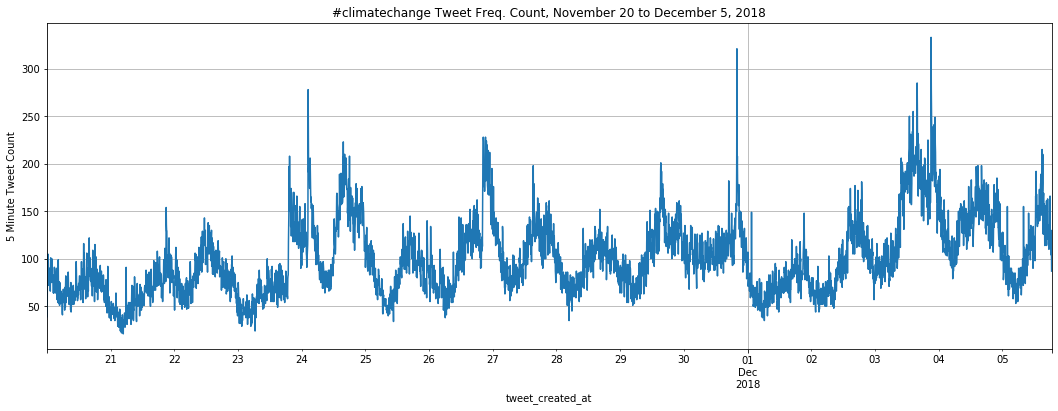

In [3]:
tweet_df_5min = tweet_df.groupby(pd.Grouper(key='tweet_created_at', freq='5Min', convention='start')).size()
tweet_df_5min.plot(figsize=(18,6))
plt.ylabel('5 Minute Tweet Count')
plt.title('#climatechange Tweet Freq. Count, November 20 to December 5, 2018')
plt.grid(True)
#plt.savefig(data_dir + "climatechange_tweet_freq_count_nov20todec5_2018.png")

## Extract Retweets

We want to extract only the retweets for some further analysis. These are the tweets with retweeted_status == 1.

In [4]:
retweet_df = tweet_df[tweet_df.retweeted_status == 1]

In [5]:
retweet_df.head()

,tweet_id,tweet_created_at,language,user_screen_name,user_created_at,user_id,followers_count,friends_count,time_zone,utc_offset,retweeted_status,retweet_id,retweet_user_screen_name,retweet_user_id,text
0,1068223635024941056,2018-11-29 19:22:15,en,JGuerreroN13,2017-06-07 20:21:48,872549171680694272,245,419,NaN,NaN,1,1068067040882233344,UNFCCC,17463923,"RT @UNFCCC: Delegates from around the world are coming to #Katowice, Poland, to participate in the @UN’s #ClimateChange convention #COP24!…"
1,1068223643765940226,2018-11-29 19:22:17,en,t_rustyboy1720,2017-09-23 03:53:34,911438362271031296,63,232,NaN,NaN,1,1068210734977490944,saskboy,6634632,"RT @saskboy: I think we most often hear the word ""depravity"" when referring to a careless driver who has killed someone through their reckl…"
2,1068223645330432001,2018-11-29 19:22:18,en,MissCJWright,2009-03-15 16:24:32,24544855,1383,4585,NaN,NaN,1,1068223231264505857,EcoSenseNow,1392956425,"RT @EcoSenseNow: It mat not be obvious, but Einstein was correct. https://t.co/B3fBXluwkY"
3,1068223649222664194,2018-11-29 19:22:19,en,al_f,2009-07-17 00:05:50,57490401,333,377,NaN,NaN,1,1068181567510626310,ClimateComms,362642209,"RT @ClimateComms: Most Americans now see #climatechange as a serious problem, believe there is still time to avoid the worst effects, and s…"
4,1068223660299677696,2018-11-29 19:22:21,en,Hawknana_,2013-12-21 03:16:04,2255917724,1751,3409,NaN,NaN,1,1068187254768590848,PortlandBEM,18030823,RT @PortlandBEM: Last week's federal climate change report is a further reminder climate-related disasters are already happening. We must t…


## Top 20 Retweets and Top 20 Retweeted

We're interested in the most-retweeted tweets and the most-retweeted users.  We can use the Pandas ```groupby``` method again to count the number of retweets for each ```retweet_id``` and each ```retweet_user_screen_name```, once again using the ```.size()``` aggregator.  We can also chain a call to sort each of resulting Series object from large to small, easily allowing us to pick off the top 20 in each Series.

In [6]:
topretweets = retweet_df.groupby('retweet_id').size().sort_values(ascending=False).reset_index()
topretweeted = retweet_df.groupby('retweet_user_screen_name').size().sort_values(ascending=False).reset_index()
print(topretweets[:20])
print(topretweeted[:20])

             retweet_id     0
0   1066155330986541058  8923
1   1067149009867878400  3316
2   1065274149461987328  3108
3   1069278755041001472  2885
4   1069686443109466113  2509
5   1068113206525202433  2409
6   1069700156067594240  1956
7   1064191037571297280  1917
8   1068595221188042753  1892
9   1066352623358361600  1653
10  1064864951087579136  1559
11  1066455536646963200  1312
12  1068092455952834560  1309
13  1065347457062789121  1273
14  1066100227969445889  1146
15  1066735102615580672  1144
16  1068798583820992512  1120
17  1068973502634647552  1067
18  1066831789283524609  1011
19  1065038836915453958   913
   retweet_user_screen_name      0
0               PaulEDawson  14947
1                    UNFCCC  14059
2               NancyPelosi   8923
3           jessphoenix2018   5870
4               MarkRuffalo   4074
5                 SenMarkey   3278
6              Poseidon_NGO   3116
7             RealMAGASteve   2885
8             SenWhitehouse   2469
9                Mik

<h2>Plot a Single Tweet Timeline Using 5 Minute 'Bins'. </h2>
<p>Next, we will use the Pandas 'groupby' command to count the number of tweets for each 5 minute increment or 'bin'. Twitter places a limit of 50 tweets per second on the number of tweets we can collect using the Streaming API. In the plot below, we can see that the maximum for our dataset was approximately 155 tweets in 5 minutes. This is roughly 1 tweet per 2 seconds, not anywhere near the limit of 50. Finally, we save the resulting plot as a PNG image file. </p>

Text(0.5, 1.0, '#climatechange Tweet ID: 1066155330986541058, Nov. 20 to Dec. 5, 2018')

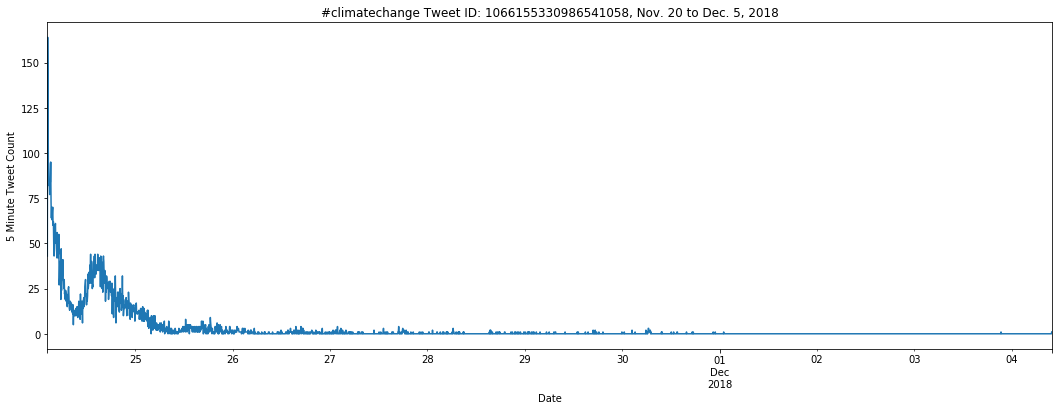

In [7]:
plt.figure(figsize=(18,6))
tweetid = '1066155330986541058'
climatechange_top_retweets = retweet_df[retweet_df.retweet_id==tweetid]
climatechange_top_retweets.groupby(pd.Grouper(key='tweet_created_at', freq='5Min', convention='start')).size().plot()

plt.xlabel('Date')
plt.ylabel('5 Minute Tweet Count')
plt.title('#climatechange Tweet ID: {}, Nov. 20 to Dec. 5, 2018'.format(tweetid))
#plt.savefig(data_dir + "climatechange_tweet_" + str(tweetid) + "_freqcount_nov20todec5_2018.png")

## Timelines of the Top 20 Retweets

Next, we will use the same ```groupby``` method to get the timelines of the retweets associated with the top 20 most retweeted tweets, grouped once more into 5-minute bins and plotted together in a single plot. However, in this example we will set lower and upper limits to the x-axis using the 'xlim' function. 

Text(0.5, 1.0, 'Top 20 Retweets, #climatechange, Nov. 20 to Dec. 5, 2018')

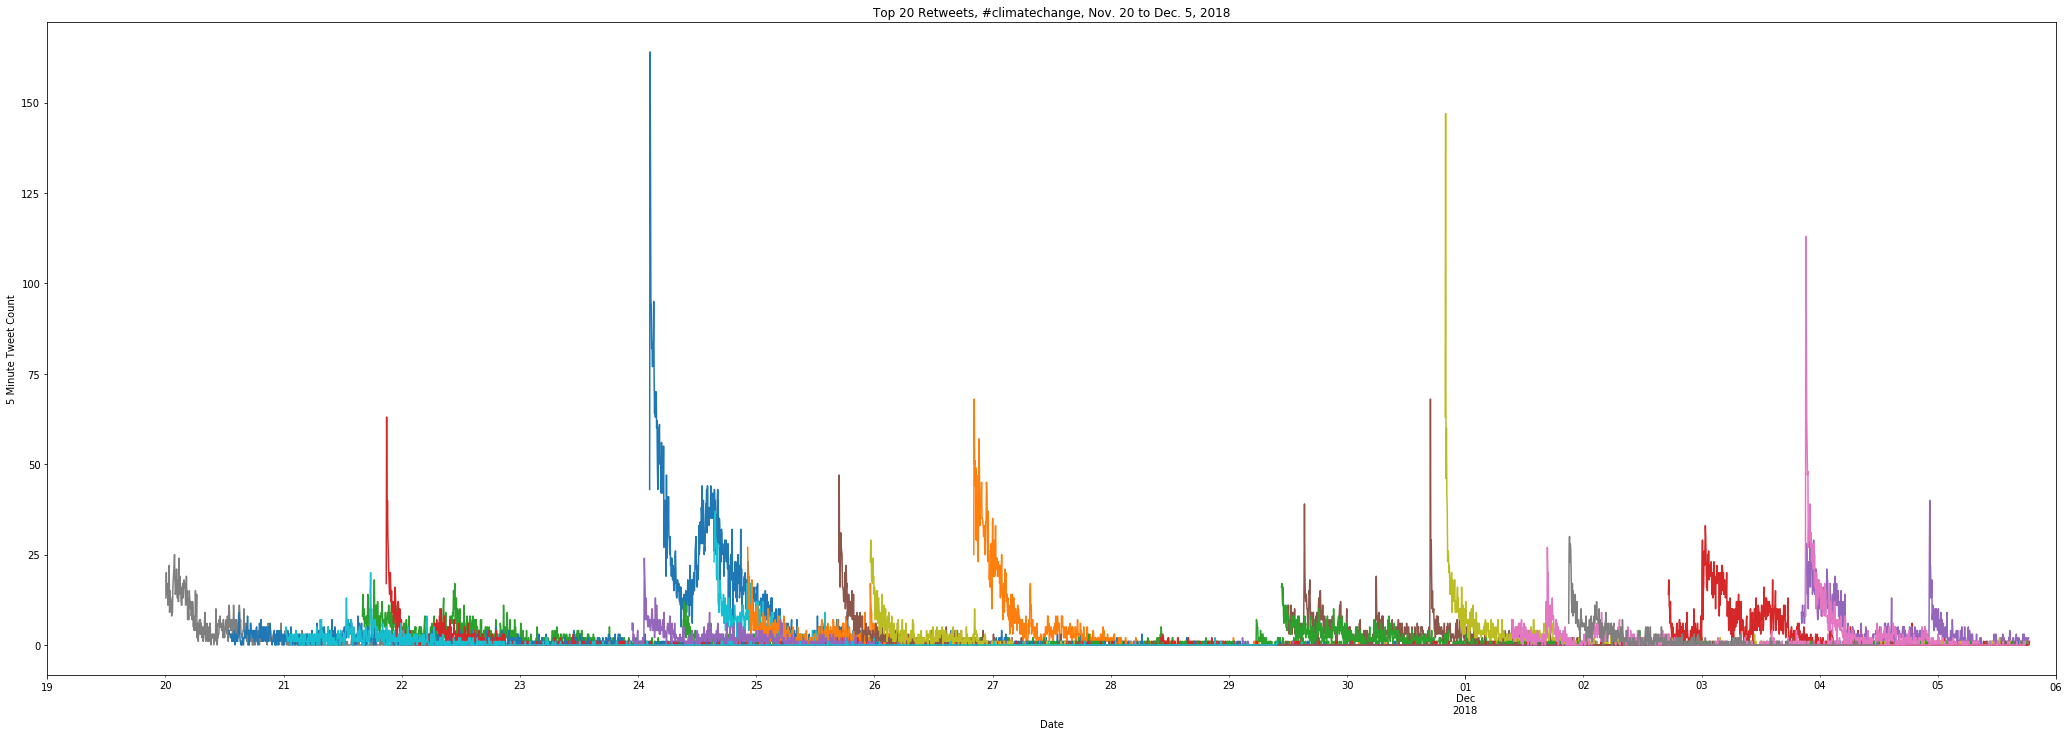

In [8]:
plt.figure(figsize=(36,12))
for top in range(0,20):
    tweetid = topretweets.iloc[top].retweet_id
    climatechange_top_retweets = retweet_df[retweet_df.retweet_id==tweetid]
    climatechange_top_retweets.groupby(\
        pd.Grouper(key='tweet_created_at', freq='5Min', convention='start')).size().plot()

plt.xlabel('Date')
plt.ylabel('5 Minute Tweet Count')
plt.xlim([datetime.date(2018, 11, 19), datetime.date(2018, 12, 6)])
plt.title('Top 20 Retweets, #climatechange, Nov. 20 to Dec. 5, 2018')
#plt.savefig(data_dir + "climatechange_top20_retweet_timelines.png")

## Cumulative Timeline of an Individual Tweet

In the next example we will use a similar approach but instead of plotting 5-minute bins of data vs. time, we want to look at a cumulative timeline, where the y-axis increments by one with each retweet.  There are various ways to generate this cumulative count: the approach taken below uses the ```reset_index()``` method to set the index to an incrementing set of integers, and then simply uses the index of the resulting dataframe as the y-axis for a matplotlib scatterplot, with the x-axis as the datetime of each tweet.

Text(0.5, 1.0, 'Tweet ID 1066155330986541058, #climatechange, Nov. 20 to Dec. 5, 2018')

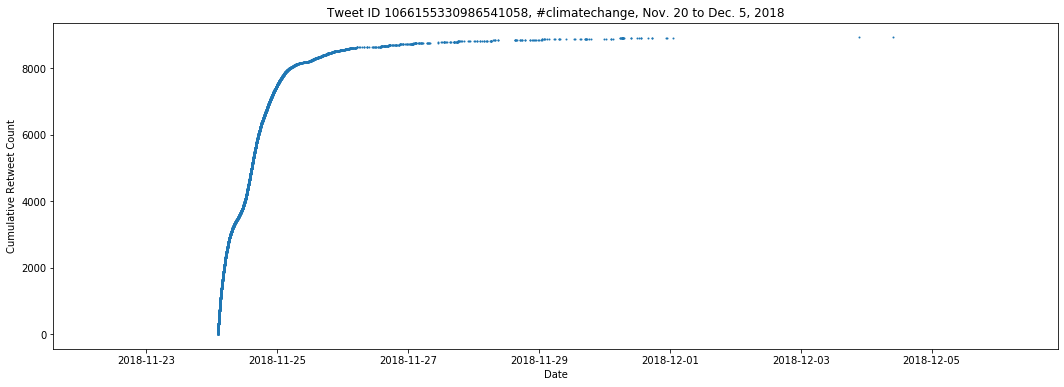

In [9]:
plt.figure(figsize=(18,6))
tweetid = '1066155330986541058'
cc_top_retweets = retweet_df[retweet_df.retweet_id==tweetid].sort_values('tweet_created_at').\
    reset_index()
plt.scatter(cc_top_retweets.tweet_created_at, cc_top_retweets.index, s=1)

plt.xlabel('Date')
plt.ylabel('Cumulative Retweet Count')
plt.title('Tweet ID 1066155330986541058, #climatechange, Nov. 20 to Dec. 5, 2018')
#plt.savefig(data_dir + "climatechange_tweet_1066155330986541058_retweet_timelines.png")

## Cumulative Timelines of the Top 20 Retweets

Finally, we leave it as an exercise to generate a plot consisting of the Top 20 retweeted tweets in a manner similar to the combined plot of tweet lifetimes in 5 minute bins. A single tweet may or may not reveal interesting features, but plotting multiple tweets together reveals interesting tweet dynamics which we cannot see with the previous approach. We see sharp points of inflection where a sudden high incidence of retweets occurs. What might be causing these?  We'll revisit these cumulative timelines in a more interactive fashion in Part 2 of the tutorial.

Text(0.5, 1.0, 'Top 20 Retweets, #climatechange, Nov. 20 to Dec. 5, 2018')

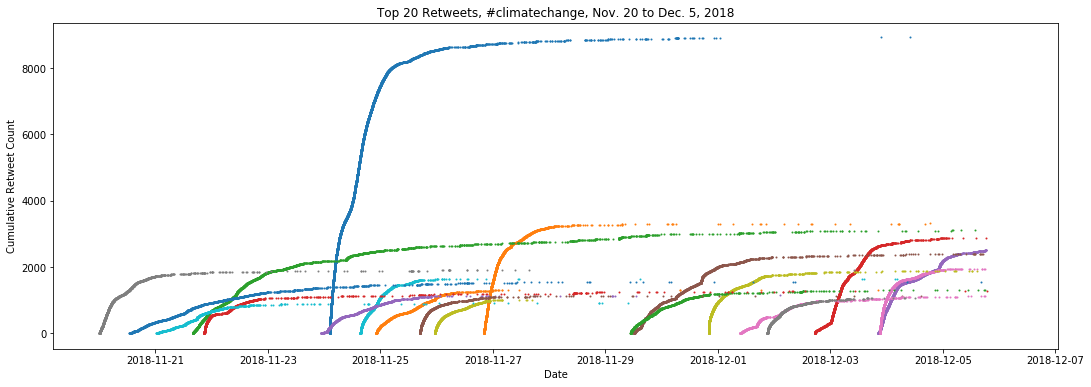

In [10]:
# TO BE REMOVED
plt.figure(figsize=(18,6))

for top in range(0,20):
    tweetid = topretweets.iloc[top].retweet_id
    cc_top_retweets = retweet_df[retweet_df.retweet_id==tweetid].sort_values('tweet_created_at').\
        reset_index()
    plt.scatter(cc_top_retweets.tweet_created_at, cc_top_retweets.index, s=1)

plt.xlabel('Date')
plt.ylabel('Cumulative Retweet Count')
plt.title('Top 20 Retweets, #climatechange, Nov. 20 to Dec. 5, 2018')
#plt.savefig(data_dir + "climatechange_top20_retweet_cumulative_timelines.png")